# 2022년 02월 기준 서울시 인구현황 분석
  - 모두의 데이터 분석(96p~156p)

### 1. pandas 모듈을 이용한 데이터처리
### 2. matplotlib 모듈을 이용한 시각화

#### 1. colab 한글 지원을 위한 글꼴 설치
- 글꼴 설치후 [런타임] - [런타임 다시 시작]

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

#### 2. 데이터 읽어오기 및 확인
- 파일 업로드
- 파일 읽어와 내용 확인하기

In [ ]:
from google.colab import files

files.upload()

Saving 202202_mf.csv to 202202_mf.csv


{'202202_mf.csv': b'\xa1\xd8 \xb8\xc5\xbf\xf9 \xb8\xbb\xc0\xcf\xc0\xda \xc5\xeb\xb0\xe8 \xc7\xf6\xc8\xb2,,,,,,,\r\n,,2022\xb3\xe202\xbf\xf9,,,,,\r\n\xc7\xe0\xc1\xa4\xb1\xe2\xb0\xfc\xc4\xda\xb5\xe5,\xc7\xe0\xc1\xa4\xb1\xe2\xb0\xfc,\xc3\xd1\xc0\xce\xb1\xb8\xbc\xf6,\xbc\xbc\xb4\xeb\xbc\xf6,\xbc\xbc\xb4\xeb\xb4\xe7 \xc0\xce\xb1\xb8,\xb3\xb2\xc0\xda \xc0\xce\xb1\xb8\xbc\xf6,\xbf\xa9\xc0\xda \xc0\xce\xb1\xb8\xbc\xf6,\xb3\xb2\xbf\xa9 \xba\xf1\xc0\xb2\r\n1100000000,\xbc\xad\xbf\xef\xc6\xaf\xba\xb0\xbd\xc3  ,"9,508,451","4,442,586",          2.14,"4,615,823","4,892,628",          0.94\r\n1111000000,\xbc\xad\xbf\xef\xc6\xaf\xba\xb0\xbd\xc3 \xc1\xbe\xb7\xce\xb1\xb8 ,"144,575","73,763",          1.96,"70,092","74,483",          0.94\r\n1111051500,\xbc\xad\xbf\xef\xc6\xaf\xba\xb0\xbd\xc3 \xc1\xbe\xb7\xce\xb1\xb8 \xc3\xbb\xbf\xee\xc8\xbf\xc0\xda\xb5\xbf,"11,953","5,251",          2.28,"5,506","6,447",          0.85\r\n1111053000,\xbc\xad\xbf\xef\xc6\xaf\xba\xb0\xbd\xc3 \xc1\xbe\xb7\xce\xb1\xb8 \xbb\

In [ ]:
import pandas as pd

age_df = pd.read_csv("202202_age.csv", encoding="cp949", header=3 , thousands=",")    # thousands="," : 쉼표 단위로 구분(제거)하라는 옵션 즉, 1,000 => 1000
display(age_df.head(3))

,행정기관코드,행정기관,총 거주자수,연령구간인구수,0세,1세,2세,3세,4세,5세,...,91세.2,92세.2,93세.2,94세.2,95세.2,96세.2,97세.2,98세.2,99세.2,100세 이상.2
0,1100000000,서울특별시,9401518,9401518,42726,44489,47751,51006,54695,61652,...,5789,4905,3899,3037,2113,1389,958,807,608,947
1,1111000000,서울특별시 종로구,141433,141433,469,478,565,544,606,746,...,115,99,78,63,56,33,17,11,12,20
2,1111051500,서울특별시 종로구 청운효자동,11749,11749,46,46,58,56,61,77,...,6,8,6,4,3,3,1,1,1,2


In [ ]:
print(age_df.info())      # thousands="," 옵션 적용 결과로 숫자형 자료들 object => int로 변환

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3866 entries, 0 to 3865
Columns: 311 entries, 행정기관코드 to 100세 이상.2
dtypes: int64(310), object(1)
memory usage: 9.2+ MB
None


- 행정기관의 데이터 타입 / 내용 출력

In [ ]:
print(type(age_df["행정기관"]))
print()
print(age_df.행정기관)

<class 'pandas.core.series.Series'>

0                서울특별시  
1             서울특별시 종로구 
2        서울특별시 종로구 청운효자동
3          서울특별시 종로구 사직동
4          서울특별시 종로구 삼청동
              ...       
3861    제주특별자치도 서귀포시 서홍동
3862    제주특별자치도 서귀포시 대륜동
3863    제주특별자치도 서귀포시 대천동
3864    제주특별자치도 서귀포시 중문동
3865    제주특별자치도 서귀포시 예래동
Name: 행정기관, Length: 3866, dtype: object


In [ ]:
print(type(age_df[["행정기관"]]))
print()
age_df[["행정기관"]]

<class 'pandas.core.frame.DataFrame'>



,행정기관
0,서울특별시
1,서울특별시 종로구
2,서울특별시 종로구 청운효자동
3,서울특별시 종로구 사직동
4,서울특별시 종로구 삼청동
...,...
3861,제주특별자치도 서귀포시 서홍동
3862,제주특별자치도 서귀포시 대륜동
3863,제주특별자치도 서귀포시 대천동
3864,제주특별자치도 서귀포시 중문동


#### 데이터 검색
- 행정기관을 기준으로 검색
- 정확한 데이터 검색: "서울특별시"
- 글자에 포함된 데이터 검색: df['텍스트필드'].str.contains("포함 문자")

In [ ]:
# 서울특별시와 일치하는 데이터 검색

#age_df.loc[0, "행정기관"]     # 공백 같은 문제점 확인
age_df[age_df.행정기관 == "서울특별시  "]

,행정기관코드,행정기관,총 거주자수,연령구간인구수,0세,1세,2세,3세,4세,5세,...,91세.2,92세.2,93세.2,94세.2,95세.2,96세.2,97세.2,98세.2,99세.2,100세 이상.2
0,1100000000,서울특별시,9401518,9401518,42726,44489,47751,51006,54695,61652,...,5789,4905,3899,3037,2113,1389,958,807,608,947


In [ ]:
# 행정기관에서 "OOOO"이 포함되어 있는 데이터 전체 조회 후 df1 저장

df1 = age_df[age_df['행정기관'].str.contains("계룡시")]   # if "공릉2동" in i[1]:
df1

,행정기관코드,행정기관,총 거주자수,연령구간인구수,0세,1세,2세,3세,4세,5세,...,91세.2,92세.2,93세.2,94세.2,95세.2,96세.2,97세.2,98세.2,99세.2,100세 이상.2
2399,4425000000,충청남도 계룡시,43345,43345,167,241,234,324,353,449,...,29,24,20,18,12,6,1,4,6,1
2400,4425031000,충청남도 계룡시 두마면,8101,8101,38,37,50,64,60,76,...,11,6,4,3,4,5,0,1,1,1
2401,4425031500,충청남도 계룡시 엄사면,18208,18208,49,81,68,95,115,142,...,16,16,12,11,7,1,1,3,3,0
2402,4425033000,충청남도 계룡시 신도안면,8524,8524,57,81,87,101,116,158,...,0,0,0,0,0,0,0,0,0,0
2403,4425051000,충청남도 계룡시 금암동,8512,8512,23,42,29,64,62,73,...,2,2,4,4,1,0,0,0,2,0


##### df1 데이터에서 행정기관을 index 값으로 지정

In [ ]:
# df1.set_index("지정필드", drop=True, inplace=False)    # 기본 값 == drop=True, inplace=False 생략시 기본 적용

# df1.set_index("행정기관", inplace=True)    => inplace=True 옵션 활용 시 바로 적용
df1

,행정기관코드,총 거주자수,연령구간인구수,0세,1세,2세,3세,4세,5세,6세,...,91세.2,92세.2,93세.2,94세.2,95세.2,96세.2,97세.2,98세.2,99세.2,100세 이상.2
행정기관,,,,,,,,,,,,,,,,,,,,,
충청남도 계룡시,4425000000,43345,43345,167,241,234,324,353,449,460,...,29,24,20,18,12,6,1,4,6,1
충청남도 계룡시 두마면,4425031000,8101,8101,38,37,50,64,60,76,85,...,11,6,4,3,4,5,0,1,1,1
충청남도 계룡시 엄사면,4425031500,18208,18208,49,81,68,95,115,142,140,...,16,16,12,11,7,1,1,3,3,0
충청남도 계룡시 신도안면,4425033000,8524,8524,57,81,87,101,116,158,150,...,0,0,0,0,0,0,0,0,0,0
충청남도 계룡시 금암동,4425051000,8512,8512,23,42,29,64,62,73,85,...,2,2,4,4,1,0,0,0,2,0


##### 원하는 필드만 출력하기
- 선택하는 방법: 데이터를 출력하는 방법과 동일, 필요한 필드를 나열
- 제외하는 방법: columns.difference([제외시킬 필드명])

In [1]:
# 원하는 데이터 추출

# df1[[필드명, 필드명, .. ]]
df1.iloc[:, [1, 3, 5, 6,7,8]]

NameError: ignored

In [ ]:
# 불필요한 데이터 제거

df1[df1.columns.difference(["행정기관코드", "총 거주자수", '연령구간인구수'])]

,0세,0세.1,0세.2,100세 이상,100세 이상.1,100세 이상.2,10세,10세.1,10세.2,11세,...,99세,99세.1,99세.2,9세,9세.1,9세.2,남 거주자수,여 거주자수,연령구간인구수.1,연령구간인구수.2
행정기관,,,,,,,,,,,,,,,,,,,,,
충청남도 계룡시,167,74,93,2,1,1,544,281,263,556,...,7,1,6,553,286,267,21612,21733,21612,21733
충청남도 계룡시 두마면,38,14,24,1,0,1,98,51,47,85,...,1,0,1,99,53,46,3987,4114,3987,4114
충청남도 계룡시 엄사면,49,18,31,1,1,0,170,85,85,194,...,4,1,3,159,84,75,8899,9309,8899,9309
충청남도 계룡시 신도안면,57,31,26,0,0,0,166,93,73,182,...,0,0,0,173,89,84,4444,4080,4444,4080
충청남도 계룡시 금암동,23,11,12,0,0,0,110,52,58,95,...,2,0,2,122,60,62,4282,4230,4282,4230


In [ ]:
df1.columns

Index(['행정기관코드', '총 거주자수', '연령구간인구수', '0세', '1세', '2세', '3세', '4세', '5세', '6세',
       ...
       '91세.2', '92세.2', '93세.2', '94세.2', '95세.2', '96세.2', '97세.2', '98세.2',
       '99세.2', '100세 이상.2'],
      dtype='object', length=310)

In [ ]:
# 0세 부터 100세 이상의 데이터만 출력(남여 공통)

df1_mf = df1.iloc[:, 3:104]
df1_mf

,0세,1세,2세,3세,4세,5세,6세,7세,8세,9세,...,91세,92세,93세,94세,95세,96세,97세,98세,99세,100세 이상
행정기관,,,,,,,,,,,,,,,,,,,,,
충청남도 계룡시,167,241,234,324,353,449,460,468,502,553,...,40,28,25,22,14,9,1,4,7,2
충청남도 계룡시 두마면,38,37,50,64,60,76,85,76,88,99,...,14,7,4,3,4,5,0,1,1,1
충청남도 계룡시 엄사면,49,81,68,95,115,142,140,142,157,159,...,23,18,16,13,9,2,1,3,4,1
충청남도 계룡시 신도안면,57,81,87,101,116,158,150,166,162,173,...,0,0,0,0,0,0,0,0,0,0
충청남도 계룡시 금암동,23,42,29,64,62,73,85,84,95,122,...,3,3,5,6,1,2,0,0,2,0


##### df1_mf 데이터를 이용해 차트 작성

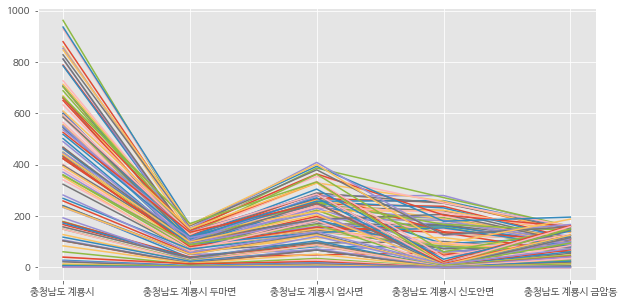

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')    # 차트에 한글 글꼴 지정

plt.style.use("ggplot")
plt.figure(figsize=(10, 5))
plt.plot(df1_mf)

plt.show()

기본출력: 행정기관 => x축, 0세 ~ 100세 이상 필드 1개가 데이터 1개

수정출력: x축에 열이름, 출력 값에 행정기관 1개의 데이터

In [ ]:
df1_mf.columns    # x축 변경

Index(['0세', '1세', '2세', '3세', '4세', '5세', '6세', '7세', '8세', '9세',
       ...
       '91세', '92세', '93세', '94세', '95세', '96세', '97세', '98세', '99세',
       '100세 이상'],
      dtype='object', length=101)

In [ ]:
df1_mf.iloc[0]   # y축 변경

0세         167
1세         241
2세         234
3세         324
4세         353
          ... 
96세          9
97세          1
98세          4
99세          7
100세 이상      2
Name: 충청남도 계룡시 , Length: 101, dtype: int64

In [ ]:
# index 값

df1_mf.index

Index(['충청남도 계룡시 ', '충청남도 계룡시 두마면', '충청남도 계룡시 엄사면', '충청남도 계룡시 신도안면',
       '충청남도 계룡시 금암동'],
      dtype='object', name='행정기관')

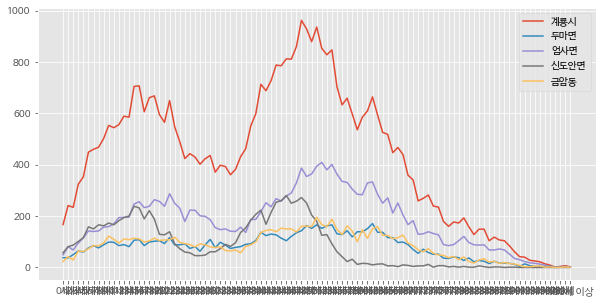

In [ ]:
# 수정 차트 작성

plt.figure(figsize=(10, 5))
plt.plot(df1_mf.columns, df1_mf.iloc[0], label="계룡시")
plt.plot(df1_mf.columns, df1_mf.iloc[1], label="두마면")
plt.plot(df1_mf.columns, df1_mf.iloc[2], label="엄사면")
plt.plot(df1_mf.columns, df1_mf.iloc[3], label="신도안면")
plt.plot(df1_mf.columns, df1_mf.iloc[4], label="금암동")

plt.legend()     # 범례표시

plt.show()

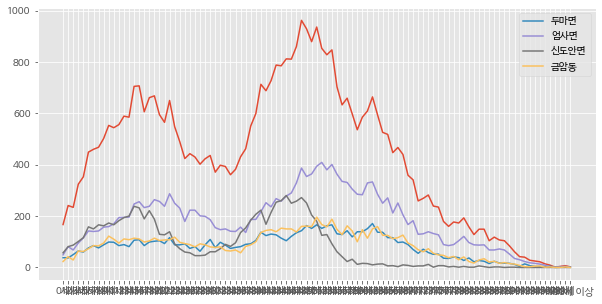

In [ ]:
# 수정 차트 작성(for 문 활용 다중 시각화)

plt.figure(figsize=(10, 5))

for i in range(len(df1_mf)):
    plt.plot(df1_mf.columns, df1_mf.iloc[i], label=df1_mf.index[i].split(" ")[-1])    

plt.legend()

plt.show()

##### bar 차트

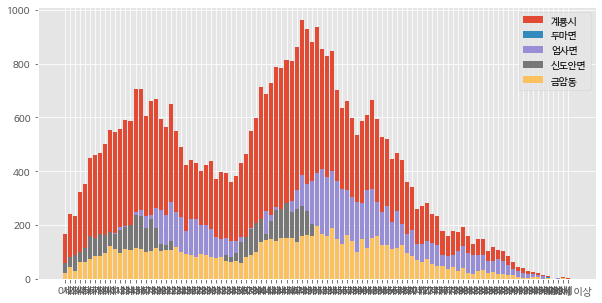

In [ ]:
# bar / barh 차트

plt.figure(figsize=(10, 5))

for i in df1_mf.index:
    if i.split(" ")[-1] == "":
        lab=i.split(" ")[-2]
    else:
        lab=i.split(" ")[-1]
    plt.bar(df1_mf.columns, df1_mf.loc[i], label=lab)    

plt.legend()

plt.show()

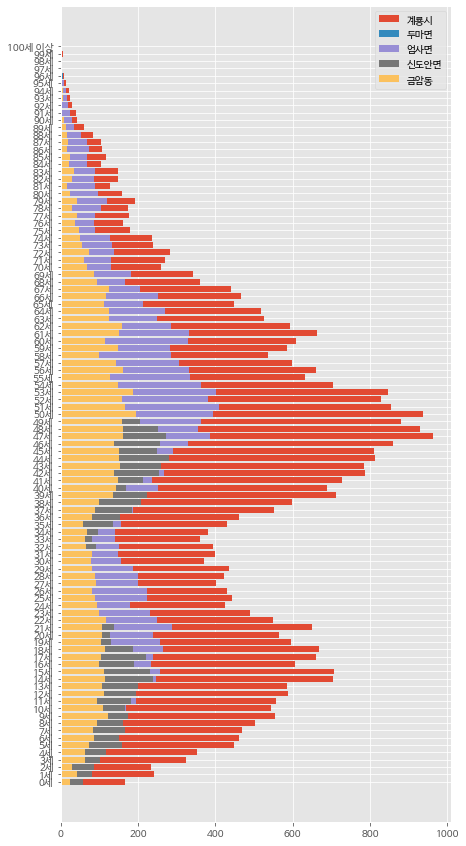

In [ ]:
# bar / barh 차트

plt.figure(figsize=(7, 15))

for i in df1_mf.index:
    if i.split(" ")[-1] == "":
        lab=i.split(" ")[-2]
    else:
        lab=i.split(" ")[-1]
    plt.barh(df1_mf.columns, df1_mf.loc[i], label=lab)    

plt.legend()

plt.show()

##### [미션] 남자 / 여자 데이터 가져오기
- df1에서 남자 데이터(df_m) / 여자 데이터(df_f) 추출해 저장하기

In [ ]:
# 위치 값 정확히 모를 경우

a = list(df1.columns).index("0세.1")    # 리스트에서 특정 값의 위치 반환
b = list(df1.columns).index("100세 이상.1")+1

df_m = df1.iloc[:, a:b]

In [ ]:
df_m = df1.iloc[:, 106:207]
df_m

,0세.1,1세.1,2세.1,3세.1,4세.1,5세.1,6세.1,7세.1,8세.1,9세.1,...,91세.1,92세.1,93세.1,94세.1,95세.1,96세.1,97세.1,98세.1,99세.1,100세 이상.1
행정기관,,,,,,,,,,,,,,,,,,,,,
충청남도 계룡시,74,127,128,154,189,215,226,220,261,286,...,11,4,5,4,2,3,0,0,1,1
충청남도 계룡시 두마면,14,23,27,30,33,34,44,35,40,53,...,3,1,0,0,0,0,0,0,0,0
충청남도 계룡시 엄사면,18,45,34,46,64,75,73,64,86,84,...,7,2,4,2,2,1,0,0,1,1
충청남도 계룡시 신도안면,31,35,50,45,58,71,73,85,83,89,...,0,0,0,0,0,0,0,0,0,0
충청남도 계룡시 금암동,11,24,17,33,34,35,36,36,52,60,...,1,1,1,2,0,2,0,0,0,0


In [ ]:
df_f = df1.iloc[:, 209:310]
df_f

,0세.2,1세.2,2세.2,3세.2,4세.2,5세.2,6세.2,7세.2,8세.2,9세.2,...,91세.2,92세.2,93세.2,94세.2,95세.2,96세.2,97세.2,98세.2,99세.2,100세 이상.2
행정기관,,,,,,,,,,,,,,,,,,,,,
충청남도 계룡시,93,114,106,170,164,234,234,248,241,267,...,29,24,20,18,12,6,1,4,6,1
충청남도 계룡시 두마면,24,14,23,34,27,42,41,41,48,46,...,11,6,4,3,4,5,0,1,1,1
충청남도 계룡시 엄사면,31,36,34,49,51,67,67,78,71,75,...,16,16,12,11,7,1,1,3,3,0
충청남도 계룡시 신도안면,26,46,37,56,58,87,77,81,79,84,...,0,0,0,0,0,0,0,0,0,0
충청남도 계룡시 금암동,12,18,12,31,28,38,49,48,43,62,...,2,2,4,4,1,0,0,0,2,0


- 남 / 여 인원수를 하나의 그래프에 출력
- 그래프는 가로 막대형
- 특정 지역의 1개의 그래프
- 전체 세대별 인원에 대한 그래프

In [ ]:
df_m

,0세.1,1세.1,2세.1,3세.1,4세.1,5세.1,6세.1,7세.1,8세.1,9세.1,...,91세.1,92세.1,93세.1,94세.1,95세.1,96세.1,97세.1,98세.1,99세.1,100세 이상.1
행정기관,,,,,,,,,,,,,,,,,,,,,
충청남도 계룡시,74,127,128,154,189,215,226,220,261,286,...,11,4,5,4,2,3,0,0,1,1
충청남도 계룡시 두마면,14,23,27,30,33,34,44,35,40,53,...,3,1,0,0,0,0,0,0,0,0
충청남도 계룡시 엄사면,18,45,34,46,64,75,73,64,86,84,...,7,2,4,2,2,1,0,0,1,1
충청남도 계룡시 신도안면,31,35,50,45,58,71,73,85,83,89,...,0,0,0,0,0,0,0,0,0,0
충청남도 계룡시 금암동,11,24,17,33,34,35,36,36,52,60,...,1,1,1,2,0,2,0,0,0,0


In [ ]:
plt.figure(figsize=(5, 5))

plt.barh(df1_mf.columns, df_m.iloc[0], label="남")
plt.barh(df1_mf.columns, df_f.iloc[0], label="여")    

plt.title(df1_mf.index[0], size=15)
plt.legend()

plt.show()



plt.barh(df1_mf.columns, df_m.iloc[1], label="남")
plt.barh(df1_mf.columns, df_f.iloc[1], label="여")    

plt.title(df1_mf.index[1], size=15)
plt.legend()

plt.show()

In [ ]:
# 5개 동시에 출력

for i in range(len(df_m)):
    plt.figure(figsize=(5, 5))

    plt.barh(df1_mf.columns, df_m.iloc[i], label="남")
    plt.barh(df1_mf.columns, df_f.iloc[i], label="여")    

    plt.title(df1_mf.index[i], size=15)
    plt.legend()

    plt.show()

- 남 왼쪽 / 여 오른쪽으로 출력되는 차트
    
    남자 데이터를 음수로 변경

In [ ]:
val = []
for i in df_m.iloc[0]:
    val.append(-i)

print(val[:10])

plt.figure(figsize=(15, 15))

plt.barh(df1_mf.columns, val, label="남")
plt.barh(df1_mf.columns, df_f.iloc[0], label="여")    

plt.title(df1_mf.index[0], size=15)
plt.legend()

plt.show()

In [ ]:
def colval(df_data):
    val = [-i for i in df_data]

    return val

for i in range(len(df_m)):
    plt.figure(figsize=(5, 5))

    plt.barh(df1_mf.columns, colval(df_m.iloc[i]), label="남")
    plt.barh(df1_mf.columns, df_f.iloc[i], label="여")    

    plt.title(df1_mf.index[i], size=15)
    plt.legend()

    plt.show()

- lambda: 간단한 함수식을 정의할때 사용
  * (lambda 매개변수 : 표현식)

In [ ]:
def aa(x, y):
    return x + y

aa(10, 12)

-10

In [ ]:
(lambda x, y: x + y)(10,12)

22

In [ ]:
(lambda x : -x)(10)

-10

In [ ]:
for i in range(len(df_m)):
    plt.figure(figsize=(5, 5))

    plt.barh(df1_mf.columns, df_m.apply(lambda x: -x).iloc[i], label="남")
    plt.barh(df1_mf.columns, df_f.iloc[i], label="여")    

    plt.title(df1_mf.index[i], size=15)
    plt.legend()

    plt.show()

In [ ]:
df1

In [ ]:
df_m.columns
df_f.columns

In [ ]:
# columns 값을 0 ~ 데이터 갯수 만큼의 숫자로 변경
df_m.columns=range(len(df_m.columns))
df_f.columns=range(len(df_f.columns))

df_m.columns
list(df_f.columns)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


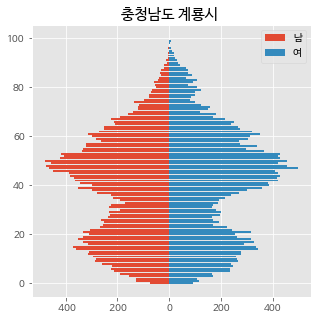

In [ ]:
# 위에서 변경한 columns를 이용해 차트 작성
plt.figure(figsize=(5, 5))

plt.barh(df_m.columns, df_m.apply(lambda x: -x).iloc[0], label="남" )
plt.barh(df_f.columns, df_f.iloc[0], label="여" )
plt.title(df_m.index[0], size=15)
plt.legend()
plt.show()

- 전체 세대별 인원에 대한 그래프(가로막대)

In [ ]:
print(df_m.sum())  # 열 기준 합계, 계료시의 남자 데이터의 세대별 합계
df_m[[0]]

In [ ]:
df_m.sum(axis=1)   # 행단위 합계 계산

행정기관
충청남도 계룡시         21612
충청남도 계룡시 두마면      3987
충청남도 계룡시 엄사면      8899
충청남도 계룡시 신도안면     4444
충청남도 계룡시 금암동      4282
dtype: int64

##### 인구 구조를 나타내는 파이 차트 작성  146p ~

In [ ]:
mf_size=[df_m.iloc[0].sum(), df_f.iloc[0].sum()]
mf_size

[21612, 21733]

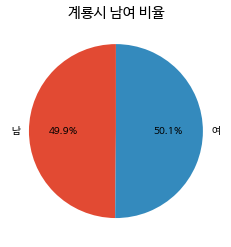

In [ ]:
from pandas.core import frame
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

plt.figure()
plt.pie(mf_size,
        labels=["남", "여"],
        autopct="%.1f%%",
        startangle=90
        )
plt.title("계룡시 남여 비율")

plt.show()

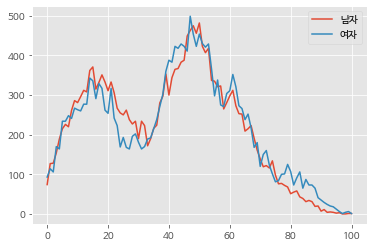

In [ ]:
plt.figure()

plt.plot(df_m.columns, df_m.iloc[0], label="남자")
plt.plot(df_f.columns, df_f.iloc[0], label="여자")
plt.legend()

plt.show()

##### 세대별 차이

In [ ]:
df_m = df1.iloc[:, 106:207]
df_m

In [ ]:
df_f = df1.iloc[:, 209:310]
df_f

In [ ]:
mf_sub = df_m - df_f
mf_sub

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
행정기관,,,,,,,,,,,,,,,,,,,,,
충청남도 계룡시,-19,13,22,-16,25,-19,-8,-28,20,19,...,-18,-20,-15,-14,-10,-3,-1,-4,-5,0
충청남도 계룡시 두마면,-10,9,4,-4,6,-8,3,-6,-8,7,...,-8,-5,-4,-3,-4,-5,0,-1,-1,-1
충청남도 계룡시 엄사면,-13,9,0,-3,13,8,6,-14,15,9,...,-9,-14,-8,-9,-5,0,-1,-3,-2,1
충청남도 계룡시 신도안면,5,-11,13,-11,0,-16,-4,4,4,5,...,0,0,0,0,0,0,0,0,0,0
충청남도 계룡시 금암동,-1,6,5,2,6,-3,-13,-12,9,-2,...,-1,-1,-3,-2,-1,2,0,0,-2,0


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


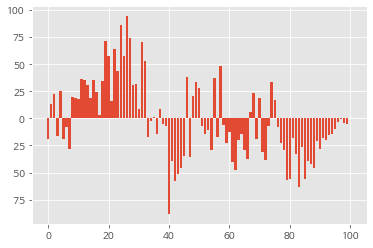

In [ ]:
plt.figure()
plt.bar(mf_sub.columns, mf_sub.iloc[0])

plt.show()

##### 산점도 차트

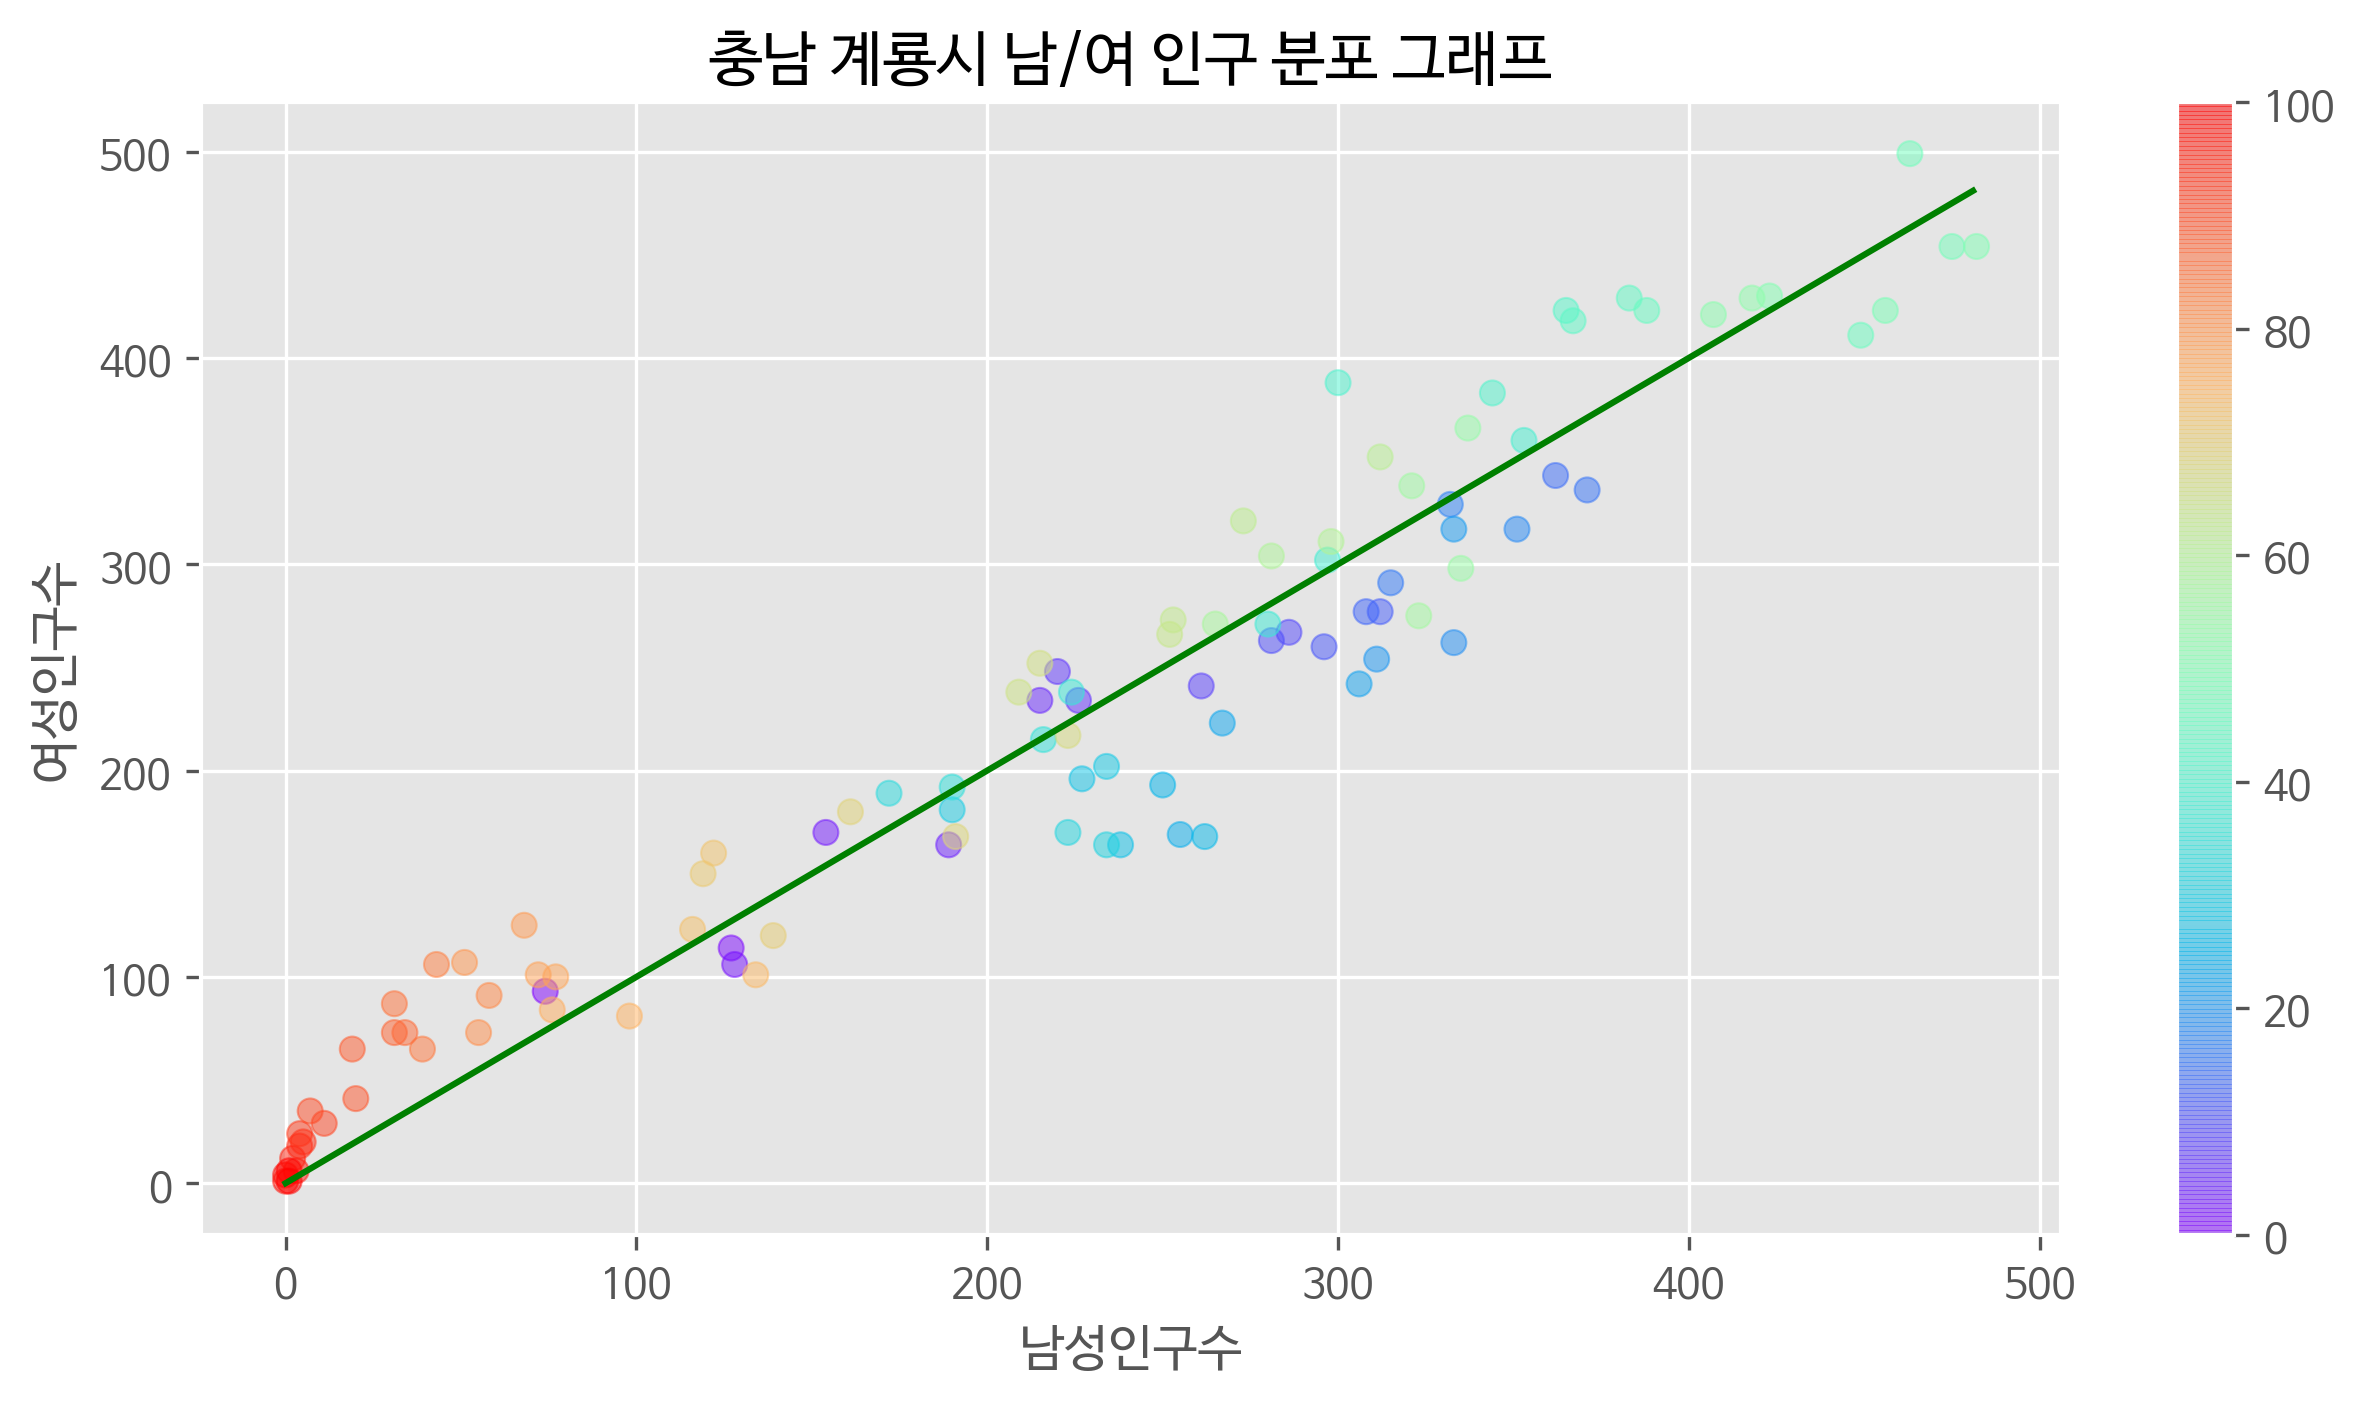

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

plt.style.use("ggplot")
plt.figure(figsize=(10, 5), dpi=300)
plt.title("충남 계룡시 남/여 인구 분포 그래프")
plt.scatter(df_m.iloc[0], df_f.iloc[0], c=df_f.columns, alpha=0.5, cmap="rainbow")
plt.colorbar()
plt.plot(range(df_m.iloc[0].max()), range(df_m.iloc[0].max()), "g")
plt.xlabel("남성인구수")
plt.ylabel("여성인구수")

plt.show()

##### 여러개의 차트 출력하기

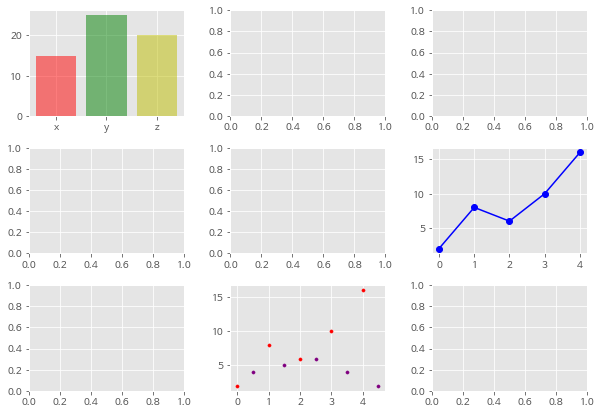

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

f, axes = plt.subplots(3, 3)

# 격자 크기 설정
f.set_size_inches((10, 7))

# 격자 여백 설정
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# [0, 0] 위치에 막대그래프 출력
axes[0, 0].bar(["x", "y", "z"], [15, 25, 20], color=['r', 'g', 'y'], alpha=0.5)

# [1, 2] 위치에 선그래프 출력
axes[1][2].plot(range(5), [2, 8, 6, 10, 16], color="blue", marker="o")

# [2, 1] 위치에 scatter 그래프 출력
axes[2, 1].scatter(range(5), [2, 8, 6, 10, 16], color="red", s=10)
axes[2, 1].scatter([0.5, 1.5, 2.5, 3.5, 4.5], [4, 5, 6, 4, 2], color="purple", s=10)

plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


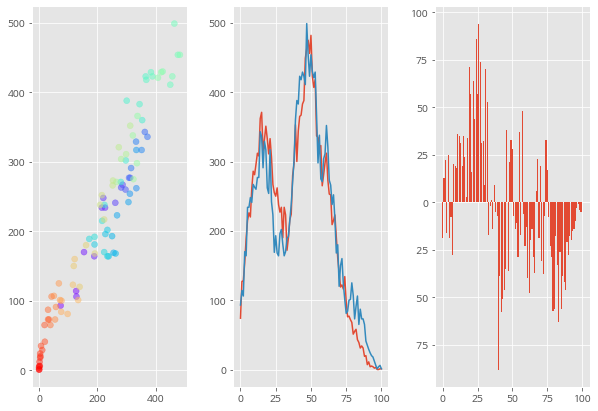

In [ ]:
# 변수 선언하고 차트 쪼개서 위치 값에 입력

import matplotlib.pyplot as plt
plt.rc("font", family="NanumBarunGothic")

f, axes = plt.subplots(1, 3)
f.set_size_inches((10, 7))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

axes[0].scatter(df_m.iloc[0], df_f.iloc[0], c=df_f.columns, alpha=0.5, cmap="rainbow")

axes[1].plot(df_m.columns, df_m.iloc[0], label="남자")
axes[1].plot(df_f.columns, df_f.iloc[0], label="여자")


axes[2].bar(mf_sub.columns, mf_sub.iloc[0])

plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


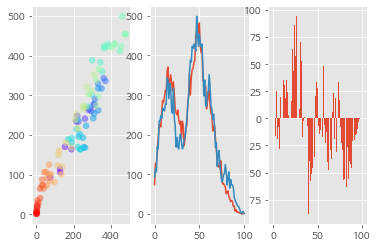

In [ ]:
# 위치 값을 직접 설정해서 차트 삽입

import matplotlib.pyplot as plt
plt.rc("font", family="NanumBarunGothic")

plt.subplot(1, 3, 1)

plt.scatter(df_m.iloc[0], df_f.iloc[0], c=df_f.columns, alpha=0.5, cmap="rainbow")

plt.subplot(1, 3, 2)
plt.plot(df_m.columns, df_m.iloc[0], label="남자")
plt.plot(df_f.columns, df_f.iloc[0], label="여자")

plt.subplot(1, 3, 3)
plt.bar(mf_sub.columns, mf_sub.iloc[0])

plt.show()